## Web APIs for data

files needed = (None! It's all coming from the cloud.)

We have been loading data from files using `read_csv()` and `read_excel()`. A second way to input data to pandas is by directly downloading data from a web server through an *application programming interface* or api. 

The [wikipedia page](https://en.wikipedia.org/wiki/Web_API) isn't that insightful, but an api is a way to directly query a webserver and (in our case) ask for data. An api provides several advantages
1. You only download the data you need
2. You do not need to distribute data files with your code
3. You have access to the 'freshest data'

There are downsides, to using apis, too.

1. You need to be online to retrieve the data
2. The group hosting the data may 'revise' the data, making it difficult to replicate you results
3. The api may change, breaking your code.

On the whole, I find apis very convenient and useful. Let's dig in. 

### The packages
The package `pandas_datareader` collects functions that interact with several popular data sources to access their apis. Thes include
* ~~Google finance~~
* Morningstar
* St. Louis Fed's Fred (one of my favorites)
* The World Bank
* Eurostat
* Quandl


### API keys

Many data providers do not want some anonymous account connecting to the api and downloading data. These providers ask you to create an account and you are given an *api key* that you pass along with your request. Sometimes keys are free, sometimes they are not.

In this notebook, we will go through a few examples that do not require api keys. At the end of the notebook are a few examples that need api keys. If you sign up for (free) keys, you can try the examples out. We will not go through them in class, because your api key should only be used by you. 

### A quick detour: Installing packages with pip
We use the Anaconda distribution, which bundles python with many [other useful packages](https://docs.anaconda.com/anaconda/packages/py3.7_win-64/). `pandas_datareader`, however, is not one that is installed by default. \[Remember, we need to *install* a package before we can *import* it. We only need to install the package once.\]

We will install the package using 'pip' the python package manager. 
1. Open a command window (open the start menu and type: 'cmd'). 
2. Run the command `pip install --user pandas_datareader` and hit enter

That should do it. It might take a minute, and fill the command window with text, but in the end it should have installed. You will probably see a message about updating pip. We can safely ignore it. You can see what packages are installed by running `pip list` at the command prompt.

Now that the package is installed, we can import it into our program like usual. 

In [28]:
import pandas as pd                       # pandas, shortened to pd

# If you receive an error while trying to load data_reader try uncommenting the line below
# This is/was a problem with an older version of pandas_datareader
# pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import data, wb    # we are grabbing the data and wb functions from the package
import matplotlib.pyplot as plt           # for plotting
import datetime as dt                     # for time and date

### FRED
The FRED database is hosted by the St. Louis FRB. It houses lots of economic and financial data. It is US-centric but has some international data, too. 

To use the FRED api you need to know the variable codes. The easiest way to do it to search on the [FRED website](https://fred.stlouisfed.org/).  

The pandas_datareader documentation for FRED is [here](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#fred).

In [ ]:
codes = ['GDPCA', 'LFWA64TTUSA647N']  # these codes are for real US gdp and the working age poplulation
                                      # the first code seems intuitive. the second does not
    
# We have the codes. Now go get the data. The DataReader() function returns a DataFrame
# Create datetime objects for the start date. If you do not spec an end date it returns up to the most
# recent date
start = dt.datetime(1970, 1, 1)
fred = data.DataReader(codes, 'fred', start)

fred.head()


In [ ]:
fred.columns = ['gdp', 'wap']           # give the variables some reasonable names

# Let's plot real gdp per working age person
fred['gdp_wap'] = fred['gdp']*1000000000/fred['wap']  # gdp data is in billions

fred.head()

In [ ]:

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(fred.index, fred['gdp_wap'], color='red')

ax.set_ylabel('2012 dollars')
ax.set_title('U.S. real GDP per working-age person')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()



### Stooq for indexes

Stooq provides historical pricing for indexes ([docs](https://pandas-datareader.readthedocs.io/en/latest/readers/stooq.html)). Let's grab the data for the Dow Jones Industrial Index.  

In [32]:
dj = data.DataReader('^DJI', 'stooq')

In [ ]:
print(dj.head())
print(dj.tail())


In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(dj.index, dj['Close'], color='blue')

ax.set_ylabel('closing price')
ax.set_title('Dow Jones Industrials')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## Practice: APIs

Take a few minutes and try the following. Feel free to chat with those around if you get stuck. The TA and I are here, too.

How has inflation in the United States evolved over the last 60 years? Let's investigate.

1. Go the FRED website and find the code for the 'Consumer price index for all urban consumers: All items less food and energy' 
2. Use the api to get the data from 1960 to the most recent. 

3. Create a variable in your DataFrame that hold the growth rate of the CPI --- the inflation rate. Compute it in percentage terms.

4. Plot it. What patterns do you see? 

5. Challenging. We computed the month-to-month inflation rate above. This is not the inflation rate we usually care about. Can you compute and plot the year-over-year inflation rate? For example, the inflation rate for 1962-05-01 would be the cpi in 1962-05-01 divided by the cpi in 1961-05-01. \[Hint: Check the documentation for `pct_change()`.

6. Annotate the decrease in inflaton around 1983 as 'Volker disinflation'

# The example below requires and api key

Where you see the code `your_api_key` is where you should enter your api key. The examples should work then. 

### Stock prices with iex

According to the [docs](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#morningstar):
>The Investors Exchange (IEX) provides a wide range of data through an API. Historical stock prices are available for up to 5 years.

IEX is one of those companies that requires an api key. These keys can be [pricey](https://iexcloud.io/pricing/) because their target market are business and app developers. They offer a free key, though for experimentation. Very cool of them. 

You can sign up here: [https://iexcloud.io/cloud-login#/register/](https://iexcloud.io/cloud-login#/register/)

In [40]:
# Sometimes you pass your key in the DataReader method. In this case, you save your key as an environmental variable. 

import os
os.environ["IEX_API_KEY"] = 'your_api_key'

In [23]:
# Harley Davidson prices. The ticker is 'HOG'

start = dt.datetime(2016, 9, 1)
end = dt.datetime(2018, 9, 1)

harley = data.DataReader('HOG', 'iex', start, end)

In [24]:
harley.head()


,open,high,low,close,volume
date,,,,,
2016-09-01,52.88,53.27,52.33,52.89,1110510
2016-09-02,53.17,53.38,52.76,53.09,960746
2016-09-06,53.33,53.60,52.36,52.42,2553778
2016-09-07,52.54,53.08,52.30,52.71,2013150
2016-09-08,52.70,52.95,51.65,52.38,1845040


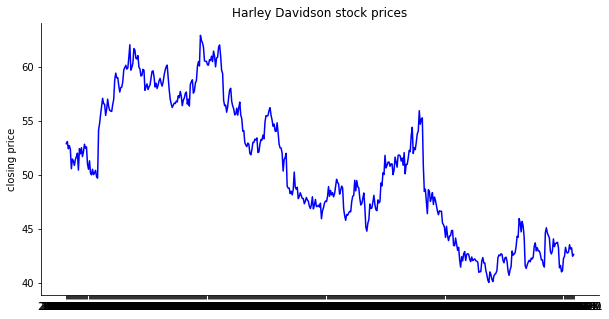

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(harley.index, harley['close'], color='blue')

ax.set_ylabel('closing price')
ax.set_title('Harley Davidson stock prices')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [26]:
# Ahhh! Not a good looking figure.

# We need to set the index to a datetime object so mpl can get the axis right...
harley.index = pd.to_datetime(harley.index)

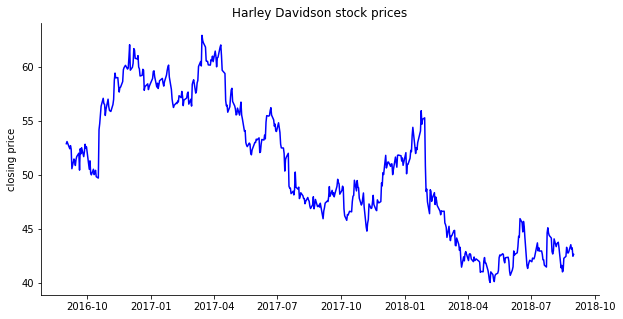

In [27]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(harley.index, harley['close'], color='blue')

ax.set_ylabel('closing price')
ax.set_title('Harley Davidson stock prices')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()